# Gravitational Orbits in Cartesian Coordinates



This program defines a GravityOrbit class that solves Lagrange's equations of motion for two orbiting particles under the influenece of gravity. Plots for these orbits are also generated and briefly discussed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [9]:
class GravityOrbit:
    """
    This class utilizes Lagrange's equations to find the positions over time of two 
    orbiting particles that are under the influence of gravity
    
    Parameters
    ----------
    m1 : float
        mass of particle 1
    m2 : float
        mass of particle 2
    G : float
        gravitational constant
        
    Methods
    -------
    dz_dt(t,z)
        Returns the right side of the differential equation in vector z,
        given time t and the corresponding value of z
    
    """
    
    def __init__(self, m1=1., m2=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
         Parameters
        ----------
        t : float
            time 
        z : float
            An 8-component vector with 
            z[0] = x1(t) and z[1] = x1_dot(t)
            z[2] = y1(t) and z[3] = y1_dot(t)
            z[4] = x2(t) and z[5] = x2_dot(t)
            z[6] = y2(t) and z[7] = y2_dot(t)
            
        Returns
        -------
        
        """
        xdiff = z[0] - z[4]
        ydiff = z[2] - z[6]
        r = np.sqrt( xdiff**2. + ydiff**2. )
        return [ \
                z[1], -self.G * self.m2 * xdiff / r**3., \
                z[3], -self.G * self.m2 * ydiff / r**3., \
                z[5], self.G * self.m1 * xdiff / r**3., \
                z[7], self.G * self.m1 * ydiff / r**3., \
               ]
    
    
    def solve_ode(self, t_pts, z_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        
        """  
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
    
#     def solve_ode_Leapfrog(self, t_pts, r_0, r_dot_0, phi_0):
#         """
#         Solve the ODE given initial conditions with the Leapfrog method.
#         """
#         delta_t = t_pts[1] - t_pts[0]
        
#         # initialize the arrays for r, rdot, r_dot_half, phi with zeros
#         num_t_pts = len(t_pts)
#         r = np.zeros(num_t_pts)
#         r_dot = np.zeros(num_t_pts)
#         r_dot_half = np.zeros(num_t_pts)
#         phi = np.zeros(num_t_pts)
        
#         # initial conditions
#         r[0] = r_0
#         r_dot[0] = r_dot_0
#         phi[0] = phi_0
        
#         # step through the differential equation
#         for i in np.arange(num_t_pts - 1):
#             t = t_pts[i]
#             y = [r[i], r_dot[i], phi[i]]
#             r_dot_half[i] = r_dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
#             r[i+1] = r[i] + r_dot_half[i] * delta_t
            
#             y = [r[i+1], r_dot[i], phi[i]]
#             r_dot[i+1] = r_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            
#             phi[i+1] = phi[i] + self.dy_dt(t,y)[2] * delta_t
#         return r, r_dot, phi   

In [10]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Plot Some Orbits

In [23]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Define parameters
G = 1.
m1 = 1.
m2 = 20.

# Instantiate orbits
o1 = GravityOrbit(m1=m1,m2=m2,G=G)

# Define initial conditions; CoM velocity is zero
x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
x2_0, x2_dot_0 = -(m1 / m2) * x1_0, -(m1 / m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1 / m2) * y1_0, -(m1 / m2) * y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]

# Solve for particle positions
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)

# Solve using leapfrog method
# x1_LF, x1_dot_LF, y1_LF, y1_dot_LF, x2_LF, x2_dot_LF, y2_LF, y2_dot_LF \
#                            = o1.solve_ode_Leapfrog(t_pts, z_0)

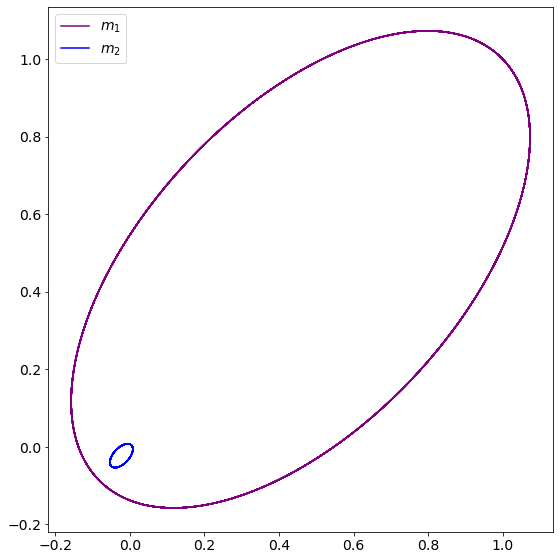

In [24]:
# Construct the plot
fig1 = plt.figure(figsize=(8,8))

ax = fig1.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color='purple', label=r'$m_1$')
ax.plot(x2, y2, color='blue', label= r'$m_2$')
ax.legend()

fig1.tight_layout()
fig1.savefig('Gravity_Orbit_Plot.jpeg', dpi=200, bbox_inches='tight')

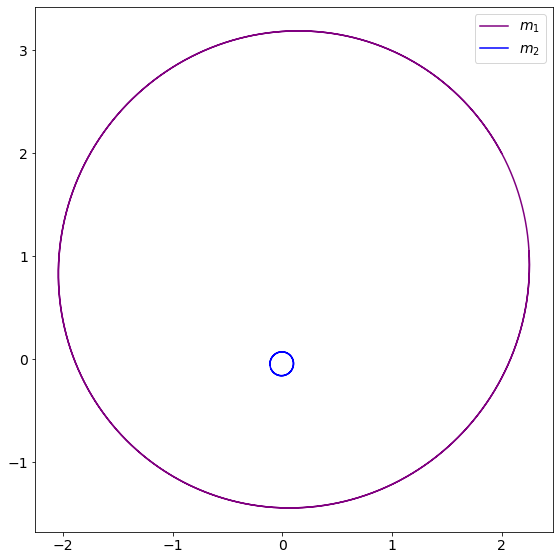

In [25]:
# Make another plot for fun
x1_0, x1_dot_0 = 2., -1.
y1_0, y1_dot_0 = 2, 2.
x2_0, x2_dot_0 = -(m1 / m2) * x1_0, -(m1 / m2) * x1_dot_0
y2_0, y2_dot_0 = -(m1 / m2) * y1_0, -(m1 / m2) * y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]

# Solve for particle positions
x1b, x1_dotb, y1b, y1_dotb, x2b, x2_dotb, y2b, y2_dotb = o1.solve_ode(t_pts, z_0)

# Construct the plot
fig2 = plt.figure(figsize=(8,8))

ax2 = fig2.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax2.plot(x1b, y1b, color='purple', label=r'$m_1$')
ax2.plot(x2b, y2b, color='blue', label= r'$m_2$')
ax2.legend()

fig2.tight_layout()
fig2.savefig('Gravity_Orbit_Plot_2.jpeg', dpi=200, bbox_inches='tight')

When one of the particles has a much larger mass than the other, their orbits start to look like familiar orbit shapes. In both examples above, the heavier mass particle is nearly stationary (i.e., its orbit is very small compared to the other particle's orbit), indicating that the plot is nearly in the heavy particle's rest frame. This was done intentionally; the initial conditions were defined to put the system in the center of mass frame. Because one mass is very heavy, it nearly overlaps the center of mass of the system, making the CoM frame a good approximation for the heavy particle's rest frame. 

Because the aforementioned conditions are met, the orbits start to take on elliptical and circular shapes--both of which were discussed in class.

## Animating First Orbit

In [30]:
from matplotlib import animation, rc
from IPython.display import HTML

In [35]:
%%capture

fig_anim = plt.figure(figsize=(5,5), num='Gravity Orbit')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(-.5, 1.5)
ax_anim.set_ylim(-.5, 1.5)

# Initialize bodies to be animated
ln1_anim, = ax_anim.plot(x1, y1, color='purple', lw=1)
ln2_anim, = ax_anim.plot(x2, y2, color='blue', lw=1)

pt1_anim, = ax_anim.plot(x1[0], y1[0], 'o', markersize=6, color='purple')
pt2_anim, = ax_anim.plot(x2[0], y2[0], 'o', markersize=6, color='blue')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [36]:
def animate_orbits(i):
    """
    This function is called by FuncAnimation to iterate the points and lines representing the particles and orbits
    
    """
    i_skip = 2 * i
    
    pt1_anim.set_data(x1[i_skip], y1[i_skip])
    pt2_anim.set_data(x2[i_skip], y2[i_skip])
    
    return (pt1_anim, pt1_anim)

In [37]:
frame_interval = 20
frame_number = 1001
anim = animation.FuncAnimation(fig_anim,
                              animate_orbits,
                              init_func=None,
                              frames=frame_number,
                              interval=frame_interval,
                              blit=True,
                              repeat=False)

In [38]:
HTML(anim.to_jshtml())